In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ReduceLROnPlateau
from kerashistoryplot.callbacks import PlotHistory, BatchHistory

import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

Using TensorFlow backend.


## Live plots during training

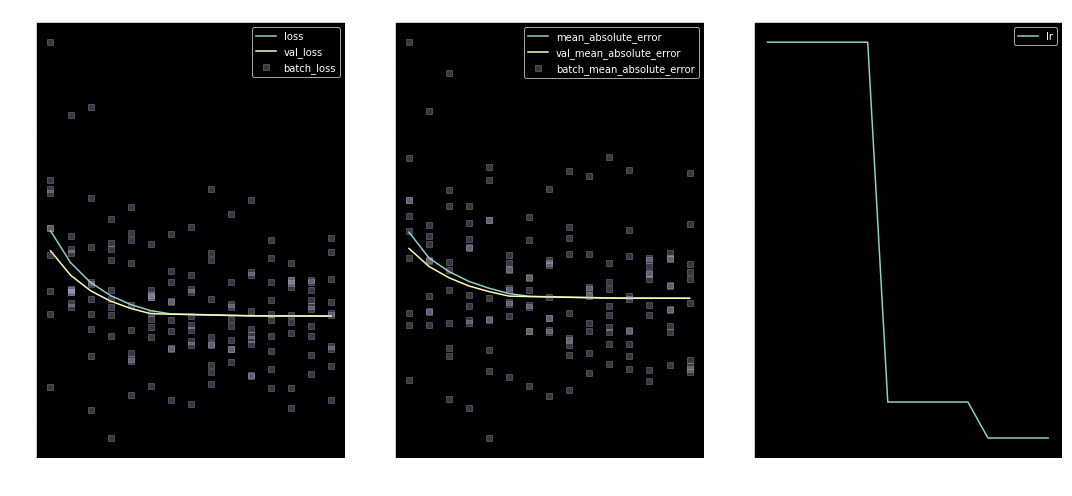

In [3]:
model = Sequential([
    Dense(1, input_shape=(1,))
])
model.compile(loss='mse', optimizer='sgd', metrics=['mae'])

X, y = np.random.rand(2, 500)
X_val, y_val = np.random.rand(2, 100)

lr_callback = ReduceLROnPlateau(monitor='val_loss', patience=5, min_delta=0.05)
plot_history_callback = PlotHistory(batches=True, n_cols=3, figsize=(15, 7))

model.fit(
    X, y, validation_data=(X, y),
    epochs=15,
    batch_size=50,
    callbacks=[
        lr_callback, 
        plot_history_callback
    ],
    verbose=1
)

## Detailed Batch History

In [4]:
model = Sequential([
    Dense(1, input_shape=(1,))
])
model.compile(loss='mse', optimizer='sgd', metrics=['mae'])

X, y = np.random.rand(2, 500)
X_val, y_val = np.random.rand(2, 100)

lr_callback = ReduceLROnPlateau(monitor='val_loss', patience=5, min_delta=0.01)
batch_history_callback = BatchHistory()

model.fit(
    X, y, validation_data=(X, y),
    epochs=3,
    batch_size=200,
    callbacks=[
        lr_callback, 
        batch_history_callback
    ],
    verbose=0
)

In [5]:
batch_history_callback.history

{'batches': [{'batch': [0, 1, 2],
   'size': [200, 200, 100],
   'loss': [0.66744363, 0.6307416, 0.60521185],
   'mean_absolute_error': [0.7508268, 0.71795577, 0.71558183]},
  {'batch': [0, 1, 2],
   'size': [200, 200, 100],
   'loss': [0.60722333, 0.5217115, 0.5485657],
   'mean_absolute_error': [0.7147552, 0.64338213, 0.66209763]},
  {'batch': [0, 1, 2],
   'size': [200, 200, 100],
   'loss': [0.54679835, 0.4608844, 0.45186073],
   'mean_absolute_error': [0.6668505, 0.6009037, 0.5893566]}],
 'val_loss': [0.5808184742927551, 0.5100722312927246, 0.45004908442497255],
 'val_mean_absolute_error': [0.6899413943290711,
  0.6380682945251465,
  0.591470992565155],
 'loss': [0.6403164625167846, 0.5612870812416076, 0.49344524145126345],
 'mean_absolute_error': [0.7306293845176697,
  0.6756744503974914,
  0.6249729990959167],
 'lr': [0.01, 0.01, 0.01],
 'epoch': [0, 1, 2]}